In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/Flight_weather.csv")
df.dropna(how='any',inplace=True)
df

,Year,Quarter,Month,DayofMonth,FlightDate,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,airport
0,2016,1,1,1,2016-01-01,741.0,0.0,745,0.0,14747,12478,1610.0,1602,0.0,8.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,SEA
1,2016,1,1,1,2016-01-01,821.0,0.0,820,1.0,14747,14107,1237.0,1204,1.0,33.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,SEA
2,2016,1,1,1,2016-01-01,759.0,1.0,724,35.0,14747,14771,1010.0,946,1.0,24.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,SEA
3,2016,1,1,1,2016-01-01,754.0,0.0,759,0.0,14747,11292,1138.0,1143,0.0,0.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,SEA
4,2016,1,1,1,2016-01-01,740.0,0.0,738,2.0,14747,12266,1401.0,1351,0.0,10.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859971,2017,4,12,17,2017-12-17,2057.0,0.0,2100,0.0,11618,13303,1.0,8,0.0,0.0,14,28,100,0.0,1024,16,10,122,32,29,123,88,EWR
1859972,2017,4,12,17,2017-12-17,2312.0,0.0,2322,0.0,13930,14771,134.0,208,0.0,0.0,10,34,100,0.0,1016,12,6,122,37,34,219,90,ORD
1859973,2017,4,12,17,2017-12-17,2306.0,1.0,2120,106.0,13930,11618,144.0,25,1.0,79.0,10,34,100,0.0,1016,12,6,122,37,34,219,90,ORD
1859974,2017,4,12,17,2017-12-17,159.0,1.0,17,102.0,14747,12266,759.0,636,1.0,83.0,10,38,100,0.8,1023,13,10,122,41,35,177,89,SEA


In [3]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
df["airport"]=le.fit_transform(df["airport"].astype(str))
df["FlightDate"]=le.fit_transform(df["FlightDate"].astype(str))
df

,Year,Quarter,Month,DayofMonth,FlightDate,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,airport
0,2016,1,1,1,0,741.0,0.0,745,0.0,14747,12478,1610.0,1602,0.0,8.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,13
1,2016,1,1,1,0,821.0,0.0,820,1.0,14747,14107,1237.0,1204,1.0,33.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,13
2,2016,1,1,1,0,759.0,1.0,724,35.0,14747,14771,1010.0,946,1.0,24.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,13
3,2016,1,1,1,0,754.0,0.0,759,0.0,14747,11292,1138.0,1143,0.0,0.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,13
4,2016,1,1,1,0,740.0,0.0,738,2.0,14747,12266,1401.0,1351,0.0,10.0,7,23,0,0.0,1030,8,10,113,34,29,108,65,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859971,2017,4,12,17,716,2057.0,0.0,2100,0.0,11618,13303,1.0,8,0.0,0.0,14,28,100,0.0,1024,16,10,122,32,29,123,88,4
1859972,2017,4,12,17,716,2312.0,0.0,2322,0.0,13930,14771,134.0,208,0.0,0.0,10,34,100,0.0,1016,12,6,122,37,34,219,90,11
1859973,2017,4,12,17,716,2306.0,1.0,2120,106.0,13930,11618,144.0,25,1.0,79.0,10,34,100,0.0,1016,12,6,122,37,34,219,90,11
1859974,2017,4,12,17,716,159.0,1.0,17,102.0,14747,12266,759.0,636,1.0,83.0,10,38,100,0.8,1023,13,10,122,41,35,177,89,13


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


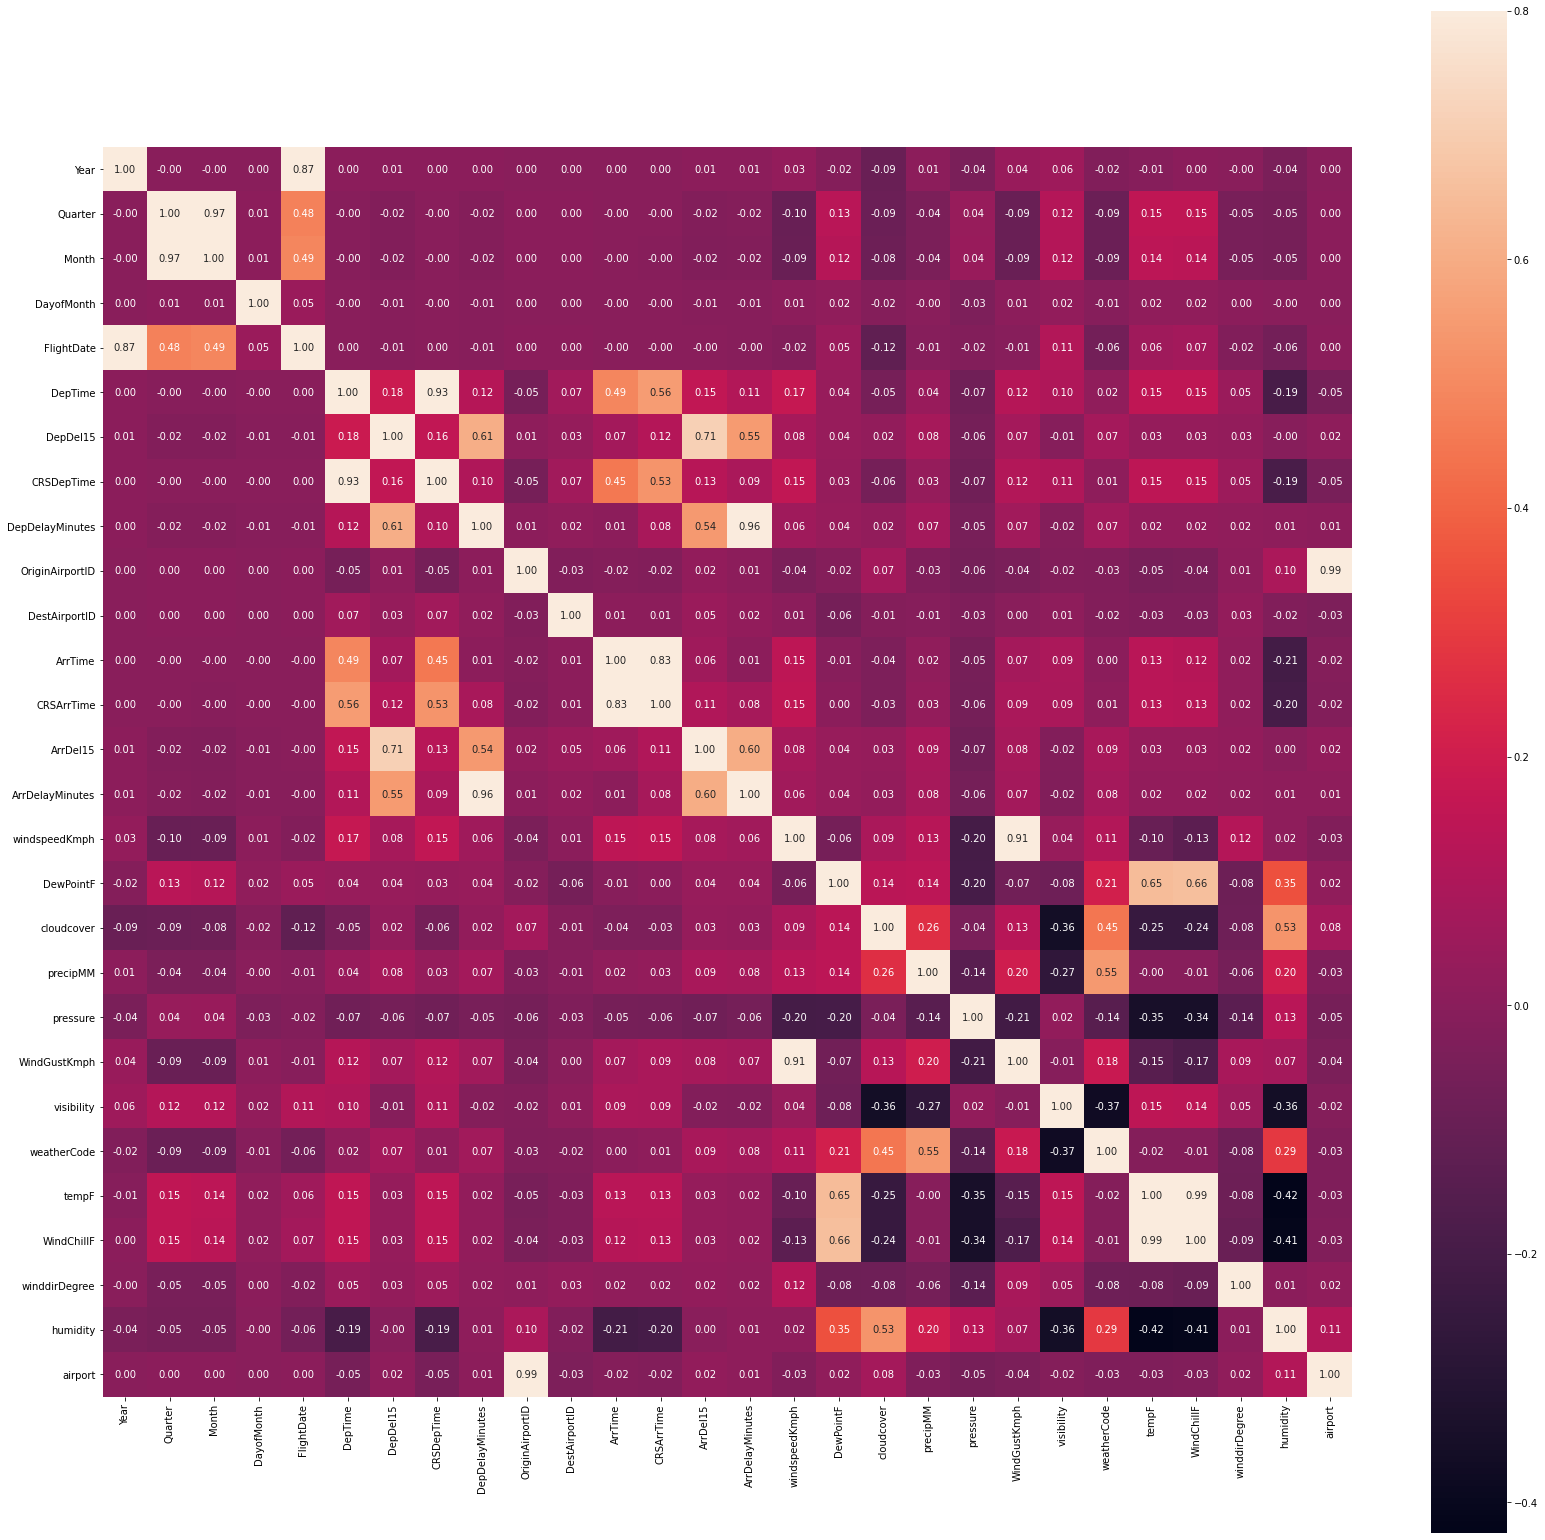

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat=df.corr()
f , ax=plt.subplots(figsize=(28,28))
sns.heatmap(corrmat, vmax = .8, square=True,annot=True,fmt='.2f');
plt.show()

In [0]:
X=df.drop(["ArrDel15","ArrDelayMinutes","ArrTime"],axis=1)
y=df["ArrDel15"]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
X_train

,Year,Quarter,Month,DayofMonth,FlightDate,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,airport
1582326,2017,3,9,26,634,1928.0,0.0,1935,0.0,12266,13303,2258,11,70,41,0.0,1011,13,10,116,86,86,109,58,5
397528,2016,2,6,20,171,2202.0,0.0,2200,2.0,12889,12478,606,14,28,0,0.0,1009,19,10,113,103,104,290,13,7
271502,2016,2,4,23,113,749.0,0.0,749,0.0,14747,12478,1600,15,48,100,0.0,1016,18,10,122,55,51,208,81,13
724384,2016,4,10,26,299,1019.0,0.0,1022,0.0,13204,12892,1250,14,63,17,0.0,1023,17,10,113,74,74,55,69,9
1704841,2017,4,10,27,665,2319.0,0.0,2325,0.0,14771,12478,748,13,59,7,0.0,1013,15,10,116,66,66,279,79,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154998,2016,1,3,1,60,1828.0,0.0,1830,0.0,13930,12892,2106,29,22,100,0.2,1015,38,10,326,27,13,341,84,11
975731,2017,1,1,25,390,1647.0,0.0,1655,0.0,14771,12892,1829,6,49,29,0.1,1027,7,10,113,52,50,272,89,14
120305,2016,1,2,17,47,1707.0,0.0,1710,0.0,13204,13930,1917,13,49,0,0.0,1019,14,10,113,74,72,302,47,9
1503854,2017,3,8,9,586,602.0,0.0,600,2.0,12892,13303,1419,5,69,0,0.0,1013,5,10,113,78,78,193,73,8


In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
y_pred=classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 1., 1.])

In [11]:
from sklearn.metrics import classification_report
print("predictions for decision trees")
print(classification_report(y_test,y_pred))

predictions for decision trees
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    289814
         1.0       0.68      0.71      0.69     77020

    accuracy                           0.87    366834
   macro avg       0.80      0.81      0.81    366834
weighted avg       0.87      0.87      0.87    366834



In [0]:
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression(max_iter=1000)

In [13]:
logisticRegr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log=logisticRegr.predict(X_test)

In [15]:
print("predictions for logistic regressor:")
print(classification_report(y_test,y_pred_log))

predictions for logistic regressor:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    289814
         1.0       0.89      0.68      0.77     77020

    accuracy                           0.92    366834
   macro avg       0.90      0.83      0.86    366834
weighted avg       0.91      0.92      0.91    366834



In [0]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators =100,criterion='entropy')

In [17]:
extra_tree_forest.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
y_pred_extratrees=extra_tree_forest.predict(X_test)

In [19]:
print("predictions for extra tree classifier:")
print(classification_report(y_test,y_pred_extratrees))

predictions for extra tree classifier:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    289814
         1.0       0.83      0.73      0.78     77020

    accuracy                           0.91    366834
   macro avg       0.88      0.85      0.86    366834
weighted avg       0.91      0.91      0.91    366834



In [0]:
from xgboost import XGBClassifier
Xgbclassifier=XGBClassifier()

In [21]:
Xgbclassifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_Xg=Xgbclassifier.predict(X_test)

In [23]:
print("predictions of Xgb classifier")
print(classification_report(y_test,y_pred_Xg))

predictions of Xgb classifier
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    289814
         1.0       0.90      0.68      0.77     77020

    accuracy                           0.92    366834
   macro avg       0.91      0.83      0.86    366834
weighted avg       0.91      0.92      0.91    366834



In [0]:
from sklearn.ensemble import RandomForestClassifier
Rfclassifier=RandomForestClassifier()

In [25]:
Rfclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ypred_rf=Rfclassifier.predict(X_test)

In [27]:
print("the predictions of random forest classifier:")
print(classification_report(y_test,ypred_rf))

the predictions of random forest classifier:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    289814
         1.0       0.88      0.70      0.78     77020

    accuracy                           0.92    366834
   macro avg       0.90      0.84      0.86    366834
weighted avg       0.92      0.92      0.91    366834

